# Handwriting recognition with OpenCV, Keras, and TensorFlow

# MB191317 # Khadeer Pasha # SJES # REGEX

In [3]:
# import the necessary packages

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import torch
import torchvision
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

#!pip install keras

!pip install numpy matplotlib torch torchvision torchaudio tensorflow

linear regression to solve a very different kind of problem: image classification.

We begin by installing and importing tensorflow. tensorflow contains some utilities for working with image data. It also provides helper classes to download and import popular datasets like MNIST automatically


In [4]:
# Download training dataset
mnist = tf.keras.datasets.mnist

It also provides helper classes to download and import popular datasets like MNIST automatically.

The data type expected by the input. Default: 'float32'.

When this statement is executed for the first time, it downloads the data to the data/ directory next to the notebook and creates a Dataset. On subsequent executions, the download is skipped as the data is already downloaded.

In [5]:
# Imports
mnist

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\shifa\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc.

In [6]:
#Training and Test Datasets
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


While building real-world machine learning models, it is quite common to split the dataset into three parts:

Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.

Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.

Test set - used to compare different models or approaches and report the model's final accuracy.

AxesImage(54,36;334.8x217.44)


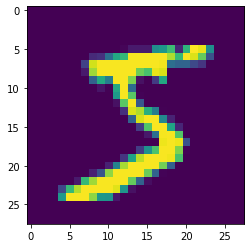

In [7]:
print(plt.imshow(x_train_full[0]))

AxesImage(54,36;334.8x217.44)


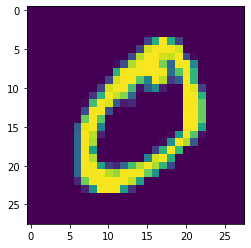

In [8]:
print(plt.imshow(x_train_full[1]))

In [9]:
print(y_train_full[0])
print(y_train_full[1])
print(y_train_full[2])
print(y_train_full[3])
print(y_train_full[4])
print(y_train_full[5])
print(y_train_full[6])
print(y_train_full[7])
print(y_train_full[8])
print(y_train_full[9])

5
0
4
1
9
2
1
3
1
4


In [10]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [11]:
# Normalization of Training images with the vector of size and A normalized copy of the array.
#x_train = tf.keras.utils.normalize(x_train, axis=1)
X_train_n = x_train_full / 255.
#.astype('float32')

In [12]:
# Normalization of Test images with the vector of size and A normalized copy of the array.
#x_test = tf.keras.utils.normalize(x_test, axis=1)
X_test_n = x_test / 255.
#.astype('float32')

In [13]:
X_train_n.shape[0]

60000

In [14]:
X_test_n.shape[0]

10000

In [15]:
X_train_n = X_train_n.reshape(X_train_n.shape[0], 28, 28, 1)
X_test_n = X_test_n.reshape(X_test_n.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

We have 10 classes (0 to 9)

The Train & Test set is standardized so that different researchers can report their models' results against the same collection of images.

In [16]:
#y_train_full = tf.keras.utils.to_categorical(y_train_full, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)

In [17]:
X_valid, X_train = X_train_n[:30000], X_train_n[30000:]
y_valid, y_train = y_train_full[:30000], y_train_full[30000:]
X_test = X_test_n

In [18]:
batch_size = 125
class_num = 10
epochs = 25
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
# Creating a Sequential model
model = tf.keras.models.Sequential()

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Sequence are a safer way to do multiprocessing. This structure guarantees that the network will only train once on each sample per epoch which is not the case with generators.

In [20]:
# Flatten is used to flatten the input, Does not affect the batch size
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

Since expects each example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.



In [21]:
# Dense layer is the regular deeply connected neural network layer and Usage of activations relu function
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

In [22]:
# Softmax activation function, 
# Softmax of each vector x is computed as exp(x) / tf.reduce_sum(exp(x)).
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

Softmax converts a real vector to a vector of categorical probabilities.

The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
#conda install pydot
#pip install pydot

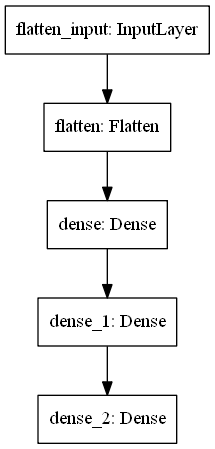

In [25]:
import pydot
keras.utils.plot_model(model)

In [26]:
weights, biases = model.layers[1].get_weights()

In [27]:
weights

array([[ 0.0266955 , -0.00956997, -0.02386561, ..., -0.0407474 ,
         0.01480078, -0.0003909 ],
       [ 0.0645309 , -0.06136192, -0.05915052, ...,  0.00383252,
         0.05406239,  0.0454815 ],
       [ 0.04063329,  0.04495002,  0.02502441, ..., -0.07481655,
        -0.04744004, -0.00538106],
       ...,
       [ 0.07165533,  0.02647582, -0.03775109, ...,  0.04878853,
         0.06870637,  0.0335247 ],
       [ 0.0292116 , -0.00655824, -0.064574  , ...,  0.05280317,
         0.04459792,  0.06810636],
       [ 0.05244254, -0.0766267 , -0.01631328, ..., -0.02399912,
         0.04406191, -0.00464956]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
print(weights.shape)
print(biases.shape)

(784, 128)
(128,)


In [30]:
# the Cross Entropy Loss function is a good way to define the error across all possibilities.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Like any optimization problem, training requires:

a) Loss function or Metric function which is Cross Entropy in this example.

b) Optimizer, here Adam Optimizer, that adjusts weights of the network.

when compiled with the loss function sparse_categorical_crossentropy, we can feed the training targets as sequences of integers. Similarly to the previous example, without the help of sparse_categorical_crossentropy, one need first to convert the output integers to one-hot encoded form to fit the model.

So, the output of the model will be in softmax one-hot like shape while the labels are integers.

In [31]:
#model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_valid, y_valid))

In [32]:
# Fit model on training data
#history = model.fit(x_train, y_train, epochs=3)
model_history = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs)

Epoch 1/25
240/240 [==============================] - 3s 2ms/step - loss: 0.7968 - accuracy: 0.7754
Epoch 2/25
240/240 [==============================] - 1s 2ms/step - loss: 0.1930 - accuracy: 0.9455
Epoch 3/25
240/240 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9618
Epoch 4/25
240/240 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9720
Epoch 5/25
240/240 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9774
Epoch 6/25
240/240 [==============================] - 1s 2ms/step - loss: 0.0548 - accuracy: 0.9838
Epoch 7/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9865
Epoch 8/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9899
Epoch 9/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9922
Epoch 10/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9938

In [33]:
model_history.params

{'verbose': 1, 'epochs': 25, 'steps': 240}

In [34]:
model_history.history

{'loss': [0.4431957006454468,
  0.18264353275299072,
  0.12611761689186096,
  0.09607389569282532,
  0.07559280097484589,
  0.058955688029527664,
  0.04722283035516739,
  0.03778940066695213,
  0.028639283031225204,
  0.023199448361992836,
  0.01931481994688511,
  0.01576441526412964,
  0.012140471488237381,
  0.011202449910342693,
  0.0084548844024539,
  0.007384900934994221,
  0.011203481815755367,
  0.008803624659776688,
  0.005792452488094568,
  0.006953730713576078,
  0.0032578143291175365,
  0.0010218730894848704,
  0.0004617151280399412,
  0.00034370351932011545,
  0.0002928667818196118],
 'accuracy': [0.8754333257675171,
  0.9471666812896729,
  0.9632666707038879,
  0.9717666506767273,
  0.9767666459083557,
  0.9819333553314209,
  0.9856666922569275,
  0.9884999990463257,
  0.9916666746139526,
  0.9932000041007996,
  0.9945999979972839,
  0.9957666397094727,
  0.9967666864395142,
  0.996833324432373,
  0.9981333613395691,
  0.9983000159263611,
  0.9962999820709229,
  0.99746668

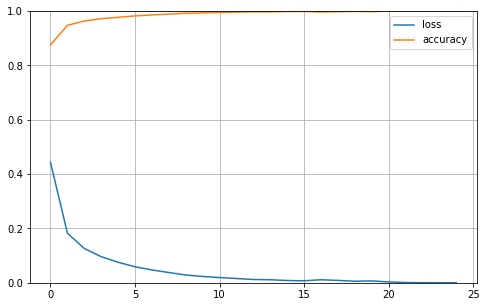

In [35]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We call fit(), which will train the model by slicing the data into "batches" of size "batch_size", and repeatedly iterating over the entire dataset for a given number of "epochs".

output on each epoch shows the loss and accuracy on both the training dataset and the test dataset.

The main purpose of this fit function is used to evaluate your model on training. This can be also used for graphing model performance.

dict_keys(['loss', 'accuracy'])


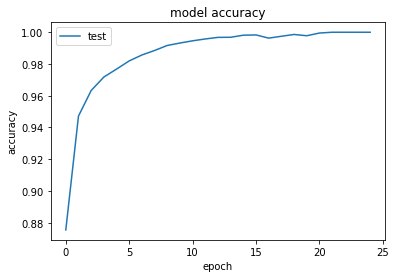

In [36]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()


dict_keys(['loss', 'accuracy'])


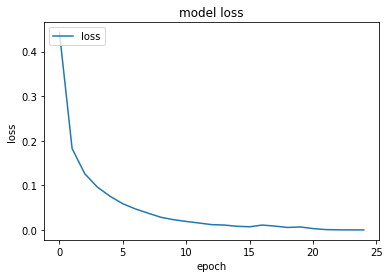

In [37]:
# list all data in history
print(model_history.history.keys())
# summarize history for loss
#plt.plot(history.history['loss'])
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [38]:
# evaluate your model on training
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 2s 2ms/step - loss: 0.1283 - accuracy: 0.9756
0.975600004196167
0.12826137244701385


In [39]:
X_new = X_test[:3]

In [40]:
y_proba = model.predict(X_new)
y_proba .round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1], dtype=int64)

AxesImage(54,36;334.8x217.44)


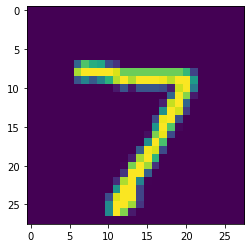

In [42]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


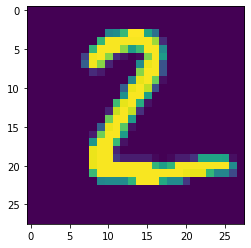

In [43]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


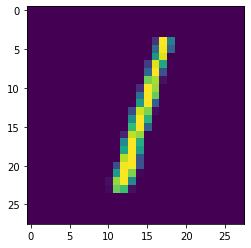

In [44]:
print(plt.imshow(X_test[2]))

In [45]:
# Saving and loading the model
model.save('Model_predict_digits')

INFO:tensorflow:Assets written to: Model_predict_digits\assets


Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

The result is probably: 0


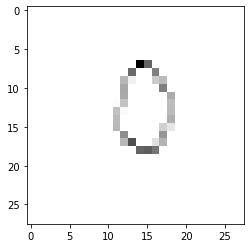

The result is probably: 1


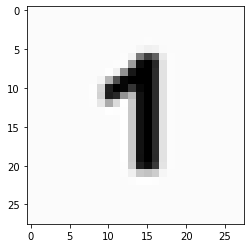

The result is probably: 2


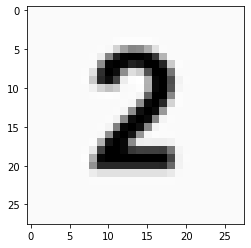

The result is probably: 3


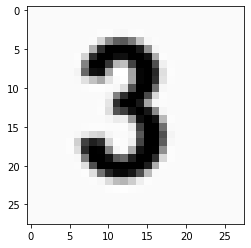

The result is probably: 4


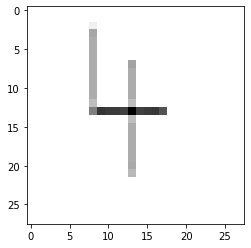

The result is probably: 5


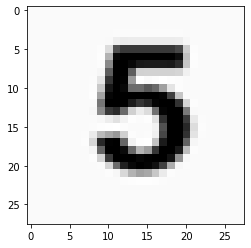

The result is probably: 6


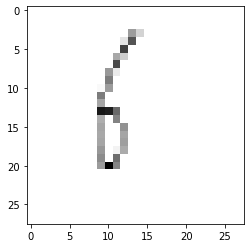

The result is probably: 7


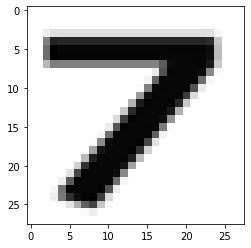

The result is probably: 8


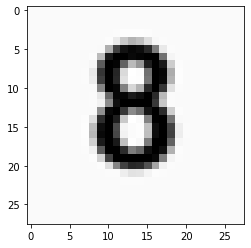

The result is probably: 8


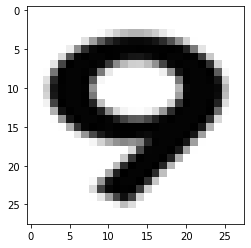

In [46]:
# Create data for this model re-uses the same image-processing module
# Let us create a random image data.
# Let us check the data provided by Keras dataset module.
for x in range(0,10):
    # path: it will be downloaded to this location (in png format).
    img = cv.imread(f'Model_predict_digits/{x}.png')[:,:,0]
    # initialising numpy array and 
    #np.invert will has negative numbers are represented by the two’s complement of the absolute value.
    img = np.invert(np.array([img]))
    # probability predictions for classification problems in Keras
    # predict() function on the finalized model.
    prediction = model.predict(img)
    # Running the example makes predictions, then prints the inputs and predictions side by side for review.
    print(f'The result is probably: {np.argmax(prediction)}')
    # Visualize prediction VS actual dataset
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    # Once you choose and fit a final deep learning model in Keras, 
    # Use it to make predictions on new data instances.

In this post you discovered the importance of having a robust way to estimate the performance of your deep learning models on unseen data.

discovered three ways that you can estimate the performance of your deep learning models in Python using the Keras library: